In [ ]:
# pip libraries 
%pip install opencv-python
%pip install keras
%pip install tensorflow

In [16]:
#importing the libraries 

import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import PIL

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import time
import os

import warnings
warnings.filterwarnings('ignore')

In [17]:
# paths for training and testing data
train_dir = './American_training_set'
test_dir = './American_test_set'

for ASL data set replace the directory path with the following :

train_dir = './training_set'
test_dir = './test_set'

In [18]:
# Define the hyperparameters
batch_size = 32
epochs = 20
image_size = (64, 64) 

In [19]:
# Data preprocessing, augmentation and normalization for training data

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


# Data normalization for training data

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')


# Data normalization for validation data

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 39365 images belonging to 26 classes.
Found 5200 images belonging to 26 classes.


# CNN MODEL


In [20]:
# Create a CNN model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=32, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 input_shape=(64, 64, 3)))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 activation='relu'))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer
model.add(Conv2D(filters=128, 
                 kernel_size=(3, 3), 
                 activation='relu'))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a flattening layer
model.add(Flatten())

# Add a fully connected (dense) layer
model.add(Dense(units=256, activation='relu'))

model.add(Dropout(0.5))

# Add the output layer (e.g., for classification)
model.add(Dense(units=26, activation='softmax'))

In [21]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'
             ])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 128)        

In [23]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=50, 
                    epochs=epochs, 
                    validation_data=test_generator,
                    verbose = 1,
                    validation_steps = 128)

Epoch 1/20
50/50 [==============================] - 4s 72ms/step - loss: 3.1754 - accuracy: 0.0806 - val_loss: 2.5408 - val_accuracy: 0.2764
Epoch 2/20
50/50 [==============================] - 3s 69ms/step - loss: 2.6566 - accuracy: 0.1863 - val_loss: 1.7537 - val_accuracy: 0.4768
Epoch 3/20
50/50 [==============================] - 4s 71ms/step - loss: 2.2288 - accuracy: 0.2925 - val_loss: 1.1969 - val_accuracy: 0.7009
Epoch 4/20
50/50 [==============================] - 4s 70ms/step - loss: 1.8297 - accuracy: 0.4119 - val_loss: 1.0636 - val_accuracy: 0.7502
Epoch 5/20
50/50 [==============================] - 3s 70ms/step - loss: 1.6876 - accuracy: 0.4444 - val_loss: 0.8824 - val_accuracy: 0.7715
Epoch 6/20
50/50 [==============================] - 4s 73ms/step - loss: 1.4167 - accuracy: 0.5275 - val_loss: 0.8182 - val_accuracy: 0.7354
Epoch 7/20
50/50 [==============================] - 4s 70ms/step - loss: 1.2920 - accuracy: 0.5606 - val_loss: 0.6304 - val_accuracy: 0.8418
Epoch 8/20
50

In [24]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Get the true labels from the test data generator
y_true = test_generator.classes

# Calculate precision, recall, and F1 score
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print(report)

f1 = f1_score(y_true, y_pred_classes, average='weighted')  # or average='macro' or 'micro'
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss:.4f}")
print(f"F1 score: {f1}")

163/163 [==============================] - 2s 14ms/step
              precision    recall  f1-score   support

           A       0.84      1.00      0.92       200
           B       1.00      1.00      1.00       200
           C       1.00      1.00      1.00       200
           D       0.99      1.00      0.99       200
           E       1.00      0.98      0.99       200
           F       1.00      1.00      1.00       200
           G       1.00      1.00      1.00       200
           H       1.00      1.00      1.00       200
           I       1.00      1.00      1.00       200
           J       1.00      1.00      1.00       200
           K       1.00      1.00      1.00       200
           L       1.00      1.00      1.00       200
           M       1.00      1.00      1.00       200
           N       1.00      1.00      1.00       200
           O       1.00      1.00      1.00       200
           P       1.00      1.00      1.00       200
           Q       1.00  

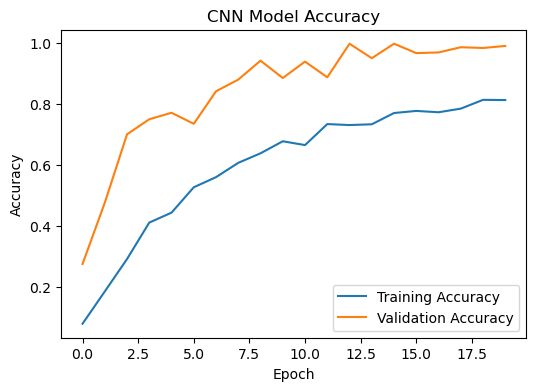

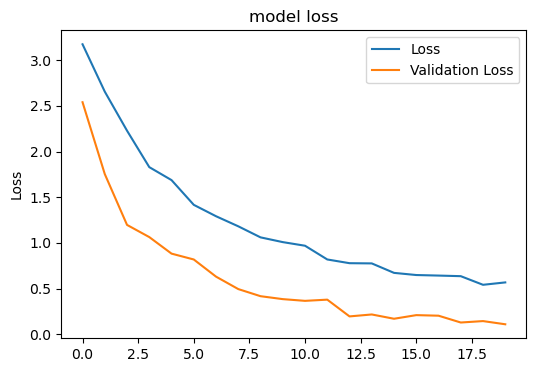

In [25]:
# Plot accuracy for CNN model
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss for CNN model
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('model loss')
plt.ylabel('Loss')
plt.legend()
plt.show()

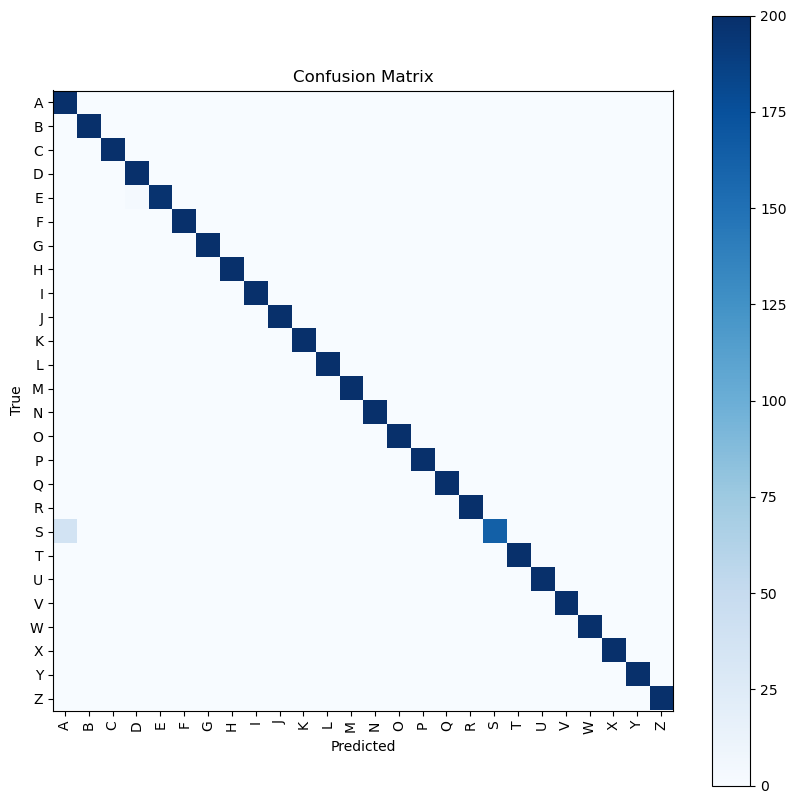

In [26]:
# Plot confusion matrix
confusion = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(26), test_generator.class_indices.keys(), rotation=90)
plt.yticks(np.arange(26), test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [27]:
# Save the model
model.save('sign_language_cnn_model.h5')

# VGG MODEL

In [28]:
# Load the VGG16 model with pretrained weights 
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


In [29]:
# Freeze the layers in the VGG model
for layer in vgg_model.layers:
    layer.trainable = False

In [30]:
# Building VGG model
model1 = Sequential([
    vgg_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax') 
    ])

In [31]:
# Compile the VGG model
model1.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'
              ])

In [32]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 26)                6682      
                                                                 
Total params: 15245914 (58.16 MB)
Trainable params: 531226 (2.03 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [33]:
# Train the VGG model
history_vgg = model1.fit(train_generator,
                         steps_per_epoch=50, 
                         epochs=epochs, 
                         validation_data=test_generator,
                         verbose = 1,
                         validation_steps = 128)

Epoch 1/20
50/50 [==============================] - 47s 953ms/step - loss: 2.5645 - accuracy: 0.2694 - val_loss: 1.4453 - val_accuracy: 0.5730
Epoch 2/20
50/50 [==============================] - 47s 949ms/step - loss: 1.5739 - accuracy: 0.5375 - val_loss: 0.9022 - val_accuracy: 0.7722
Epoch 3/20
50/50 [==============================] - 47s 947ms/step - loss: 1.2006 - accuracy: 0.6419 - val_loss: 0.6847 - val_accuracy: 0.7996
Epoch 4/20
50/50 [==============================] - 46s 936ms/step - loss: 0.9024 - accuracy: 0.7394 - val_loss: 0.4775 - val_accuracy: 0.9050
Epoch 5/20
50/50 [==============================] - 46s 930ms/step - loss: 0.7831 - accuracy: 0.7606 - val_loss: 0.4209 - val_accuracy: 0.9407
Epoch 6/20
50/50 [==============================] - 46s 940ms/step - loss: 0.6956 - accuracy: 0.7919 - val_loss: 0.3279 - val_accuracy: 0.9629
Epoch 7/20
50/50 [==============================] - 47s 949ms/step - loss: 0.5866 - accuracy: 0.8200 - val_loss: 0.3016 - val_accuracy: 0.9565

In [34]:
# Evaluate the model
test_loss, test_acc = model1.evaluate(test_generator)
y_pred = model1.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Get the true labels from the test data generator
y_true = test_generator.classes

# Calculate precision, recall, and F1 score
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print(report)

f1 = f1_score(y_true, y_pred_classes, average='weighted')  # or average='macro' or 'micro'
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss:.4f}")
print(f"F1 score: {f1}")

163/163 [==============================] - 41s 249ms/step
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       200
           B       1.00      1.00      1.00       200
           C       1.00      1.00      1.00       200
           D       1.00      1.00      1.00       200
           E       1.00      1.00      1.00       200
           F       0.95      1.00      0.98       200
           G       1.00      1.00      1.00       200
           H       1.00      1.00      1.00       200
           I       1.00      0.95      0.97       200
           J       1.00      1.00      1.00       200
           K       1.00      0.99      0.99       200
           L       1.00      1.00      1.00       200
           M       0.56      1.00      0.72       200
           N       1.00      0.77      0.87       200
           O       1.00      1.00      1.00       200
           P       1.00      1.00      1.00       200
           Q       1.00

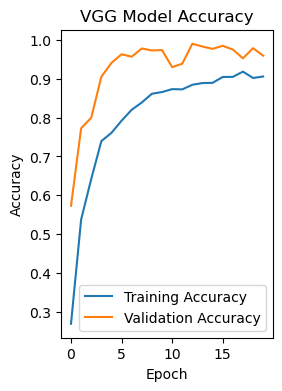

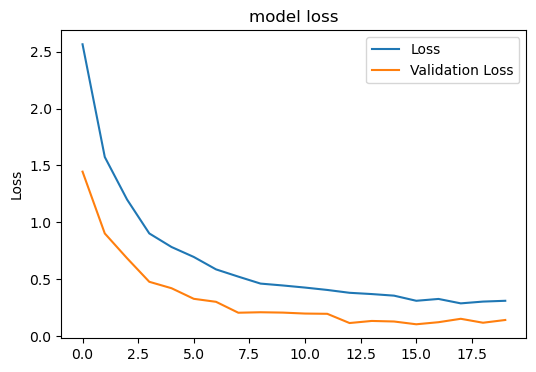

In [35]:
# Plot accuracy for VGG model
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Training Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss for VGG model
plt.figure(figsize=(6, 4))
plt.plot(history_vgg.history['loss'], label='Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.title('model loss')
plt.ylabel('Loss')
plt.legend()
plt.show()

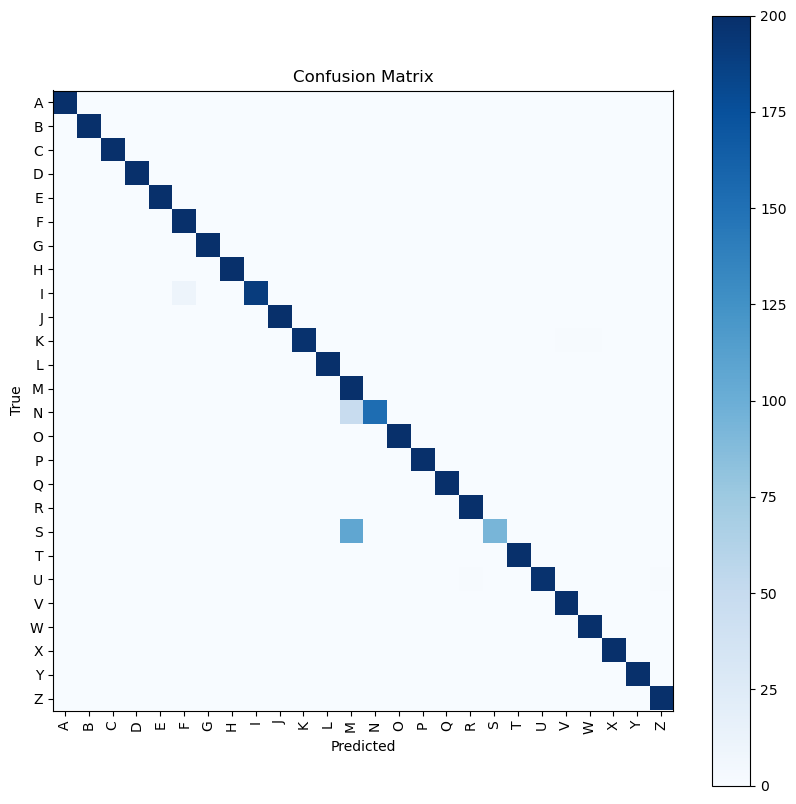

In [36]:
# Plot confusion matrix
confusion = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(26), test_generator.class_indices.keys(), rotation=90)
plt.yticks(np.arange(26), test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
# Save the model
model1.save('sign_language_vgg_model.h5')

# RESNET MODEL

In [38]:
# Load the ResNet50 model with pretrained weights (remove the top fully connected layers)
resnet_model = ResNet50(weights='imagenet', 
                        include_top=False, 
                        input_shape=(64, 64, 3))

In [39]:
# Freeze the layers in the ResNet model
for layer in resnet_model.layers:
    layer.trainable = False

In [40]:
# Build your custom model on top of ResNet
model2 = Sequential([
    resnet_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax') 
    ])

In [41]:
# Compile the ResNet model
model2.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'
             ])

In [42]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 26)                6682      
                                                                 
Total params: 25691802 (98.01 MB)
Trainable params: 2104090 (8.03 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [43]:
# Train the ResNet model
history_resnet = model2.fit(train_generator,
                            steps_per_epoch=50, 
                            epochs=epochs, 
                            validation_data=test_generator,
                            verbose = 1,
                            validation_steps = 128)


Epoch 1/20
50/50 [==============================] - 20s 372ms/step - loss: 2.9611 - accuracy: 0.1594 - val_loss: 2.1729 - val_accuracy: 0.4409
Epoch 2/20
50/50 [==============================] - 18s 370ms/step - loss: 2.5216 - accuracy: 0.2444 - val_loss: 1.8979 - val_accuracy: 0.4749
Epoch 3/20
50/50 [==============================] - 19s 376ms/step - loss: 2.3233 - accuracy: 0.3200 - val_loss: 1.6062 - val_accuracy: 0.6226
Epoch 4/20
50/50 [==============================] - 19s 383ms/step - loss: 2.1486 - accuracy: 0.3569 - val_loss: 1.4455 - val_accuracy: 0.6343
Epoch 5/20
50/50 [==============================] - 19s 387ms/step - loss: 2.0293 - accuracy: 0.3688 - val_loss: 1.3062 - val_accuracy: 0.6069
Epoch 6/20
50/50 [==============================] - 20s 400ms/step - loss: 1.9578 - accuracy: 0.3944 - val_loss: 1.3140 - val_accuracy: 0.6250
Epoch 7/20
50/50 [==============================] - 20s 405ms/step - loss: 1.8299 - accuracy: 0.4294 - val_loss: 1.1676 - val_accuracy: 0.6865

In [44]:
# Evaluate the model
test_loss, test_acc = model2.evaluate(test_generator)
y_pred = model1.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Get the true labels from the test data generator
y_true = test_generator.classes

# Calculate precision, recall, and F1 score
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print(report)

f1 = f1_score(y_true, y_pred_classes, average='weighted')  # or average='macro' or 'micro'\
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss:.4f}")
print(f"F1 score: {f1}")

163/163 [==============================] - 41s 253ms/step
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       200
           B       1.00      1.00      1.00       200
           C       1.00      1.00      1.00       200
           D       1.00      1.00      1.00       200
           E       1.00      1.00      1.00       200
           F       0.95      1.00      0.98       200
           G       1.00      1.00      1.00       200
           H       1.00      1.00      1.00       200
           I       1.00      0.95      0.97       200
           J       1.00      1.00      1.00       200
           K       1.00      0.99      0.99       200
           L       1.00      1.00      1.00       200
           M       0.56      1.00      0.72       200
           N       1.00      0.77      0.87       200
           O       1.00      1.00      1.00       200
           P       1.00      1.00      1.00       200
           Q       1.00

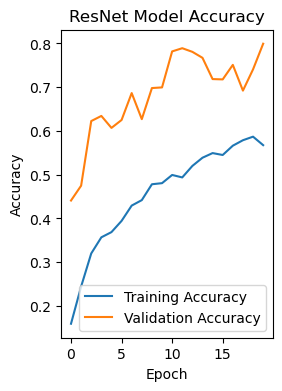

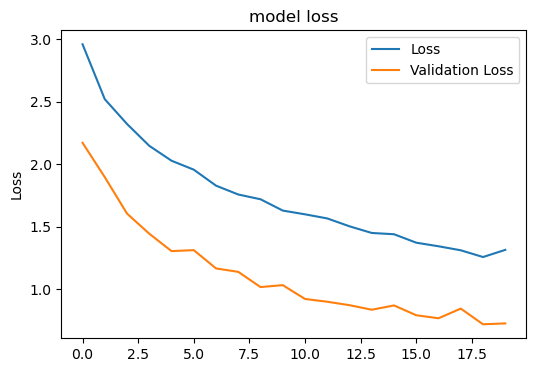

In [45]:
# Plot accuracy for ResNet model
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss for ResNet model
plt.figure(figsize=(6, 4))
plt.plot(history_resnet.history['loss'], label='Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('model loss')
plt.ylabel('Loss')
plt.legend()
plt.show()

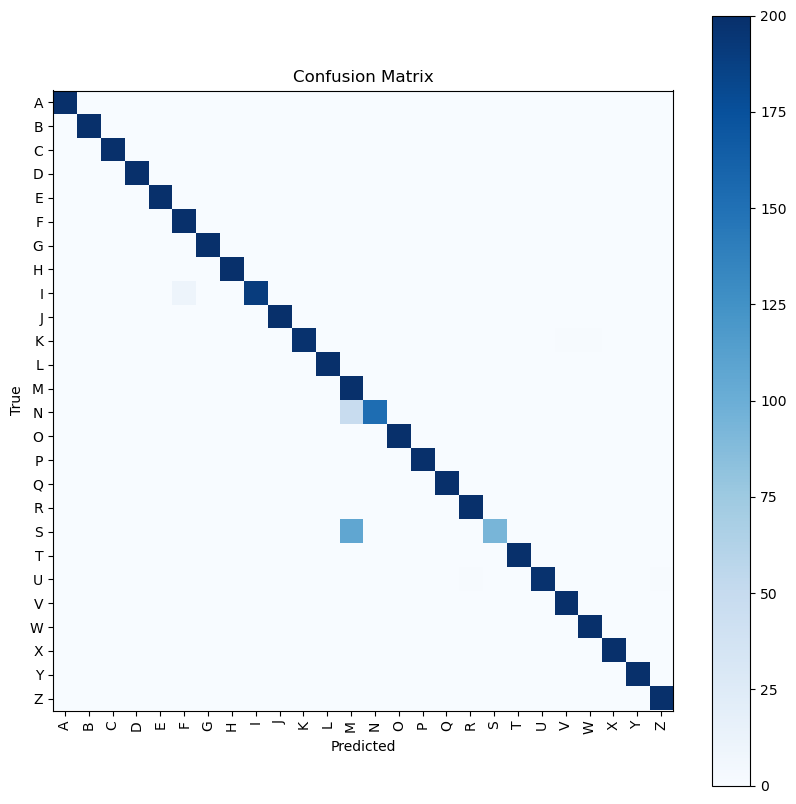

In [46]:
# Plot confusion matrix
confusion = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(26), test_generator.class_indices.keys(), rotation=90)
plt.yticks(np.arange(26), test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [47]:
# Save the model
model2.save('sign_language_resnet_model.h5')

# Comparison of Validation Accuracies

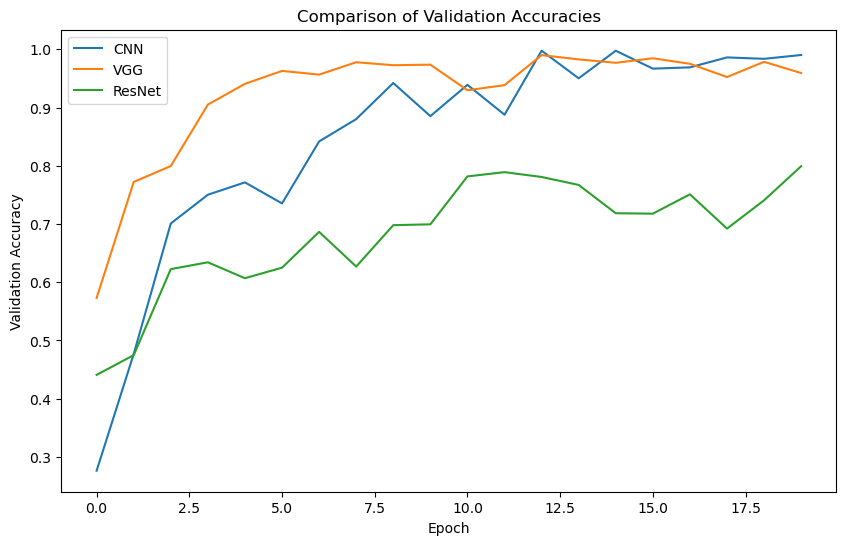

In [48]:
import matplotlib.pyplot as plt

# List of model names and their corresponding histories
model_names = ['CNN', 'VGG', 'ResNet']  # Add more model names as needed
model_histories = [history, history_vgg, history_resnet]  # Replace with actual histories

# Extract validation accuracies from the histories
val_accuracies = [history.history['val_accuracy'] for history in model_histories]

# Plot comparison of validation accuracies
plt.figure(figsize=(10, 6))
for name, acc in zip(model_names, val_accuracies):
    plt.plot(acc, label=name)

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Validation Accuracies')
plt.legend()
plt.show()